# Simple email spam classification

## Overview
As part of my practice for machine learning and deep learning techniques while building a portfolio of practical projects, this project served as an ideal opportunity to delve into the realm of text classification in real-world scenarios

## Objectives
By implementing different algorithms such as logistic regression, support vector machines etc, I wish to explore the efficacy of different methodologies in distinguishing spam and non-spam emails. And with the help of using natural language processing techniques such as TF-IDF vectorization to preprocess the text data, the goal to achieve high accuracy in classifying emails.

## Dataset descriptions
Dataset soucre : Dataset soucre : https://www.kaggle.com/datasets/amouschocolovski/taylor-swift-era-tour-dataset/data . The dataset consist of a csv file where it include a csv file. The dataset consist of informations such as the message and category if ham/spam where ham means its non-spam and spam means its spam. The dataset are fairly small with roughly around 5000 data.

# Data preparation and pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
df = pd.read_csv('email.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Display data types of each columns
df.dtypes

Category    object
Message     object
dtype: object

In [4]:
# Display column names
df.columns

Index(['Category', 'Message'], dtype='object')

In [5]:
# Check for duplicate rows
df.duplicated().sum()

415

In [6]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# Filter the DataFrame to show duplicated rows
duplicated_rows = df[df.duplicated()]

# Print 10 examples of duplicated rows
print("Examples of duplicated rows:")
print(duplicated_rows.head(10)) 

Examples of duplicated rows:
    Category                                            Message
103      ham  As per your request 'Melle Melle (Oru Minnamin...
154      ham  As per your request 'Melle Melle (Oru Minnamin...
207      ham  As I entered my cabin my PA said, '' Happy B'd...
223      ham                             Sorry, I'll call later
326      ham                   No calls..messages..missed calls
339      ham                             Sorry, I'll call later
357     spam  Congratulations ur awarded 500 of CD vouchers ...
444      ham                             Sorry, I'll call later
492     spam  Congrats! 1 year special cinema pass for 2 is ...
533      ham                  Gudnite....tc...practice going on


In [8]:
# if duplicate rows are found, drop them with:
df = df.drop_duplicates()

In [9]:
# Check for duplicate rows again to confirm duplicate rows are dropped
df.duplicated().sum()

0

In [10]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Category    0
Message     0
dtype: int64


In [11]:
# Filter the DataFrame to exclude the unwanted classification
df = df[(df['Category'] == 'ham') | (df['Category'] == 'spam')]

In [12]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['Spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Data visualization of dataset after pre-processing

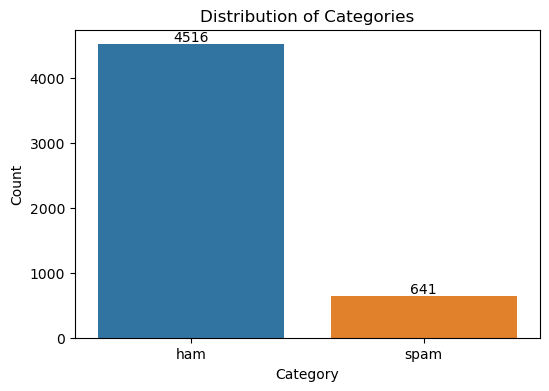

In [14]:
import seaborn as sns

# Count the number of ham(not spam) and spam
category_counts = df['Category'].value_counts()

# Visualize the distribution of the 'Category' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Annotate count for each category
for i, count in enumerate(category_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

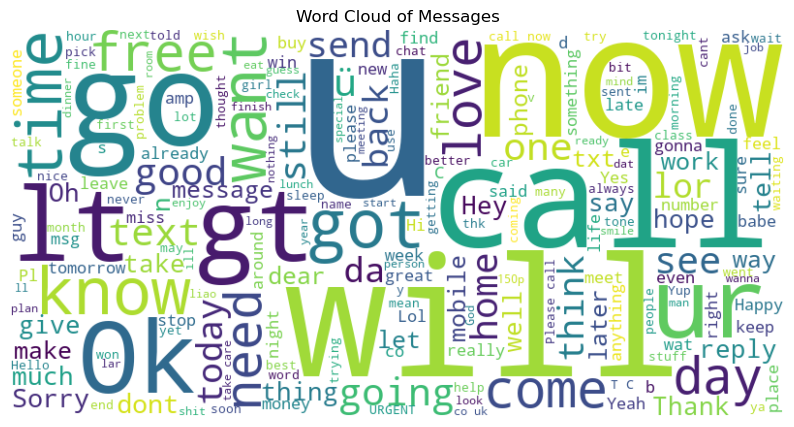

In [15]:
from wordcloud import WordCloud

# Generate word cloud
messages = ' '.join(df['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(messages)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Messages')
plt.axis('off')
plt.show()

# Feature engineering
#### TFIDF to transform the dataset into numerical format for the ML algorithms to understand

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the 'Message' column
X_tfidf = tfidf_vectorizer.fit_transform(df['Message']).toarray()

y=df['Spam']

#### The splitting of dataset into train test split such as training and testing sets.

In [17]:
from sklearn.model_selection import train_test_split


# Splitting dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Logistic Regression base model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logisitic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the test results
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1345
           1       0.97      0.73      0.84       203

    accuracy                           0.96      1548
   macro avg       0.97      0.87      0.91      1548
weighted avg       0.96      0.96      0.96      1548



In [19]:
from sklearn.metrics import accuracy_score

log_acc=accuracy_score(y_test,y_pred)
log_acc

0.962532299741602

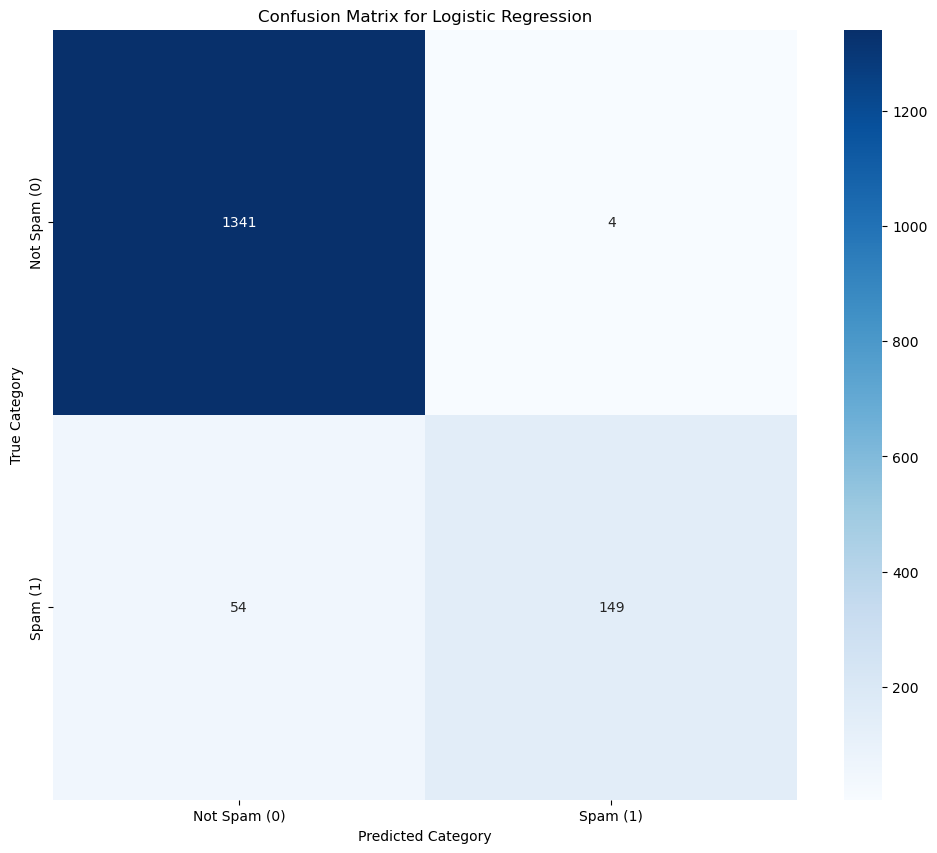

In [20]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define the labels
labels = ['Not Spam (0)', 'Spam (1)']

# Plotting the confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix,annot=True,fmt='d', cmap="Blues" , xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.show()

# Naive Bayes base model

In [21]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred_nb = nb_classifier.predict(X_test)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1345
           1       0.98      0.91      0.94       203

    accuracy                           0.99      1548
   macro avg       0.98      0.95      0.97      1548
weighted avg       0.99      0.99      0.99      1548



In [22]:
naive_acc=accuracy_score(y_test,y_pred_nb)
naive_acc

0.9857881136950905

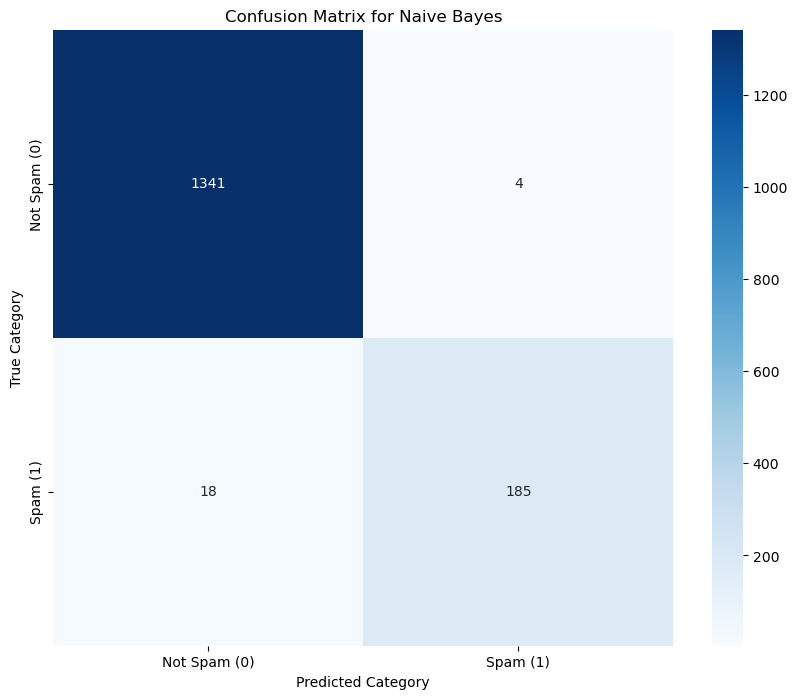

In [23]:
# Generate confusion matrix
conf_mat_NB=confusion_matrix(y_test, y_pred_nb)

# Define the labels
labels = ['Not Spam (0)', 'Spam (1)']

plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_NB,annot=True,fmt='d', cmap="Blues" , xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.show()

# Support Vector Machine model

In [24]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=2)  # Start with linear kernel
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1345
           1       0.95      0.91      0.93       203

    accuracy                           0.98      1548
   macro avg       0.97      0.95      0.96      1548
weighted avg       0.98      0.98      0.98      1548



In [25]:
svm_acc=accuracy_score(y_test,y_pred_svm)
svm_acc

0.9819121447028424

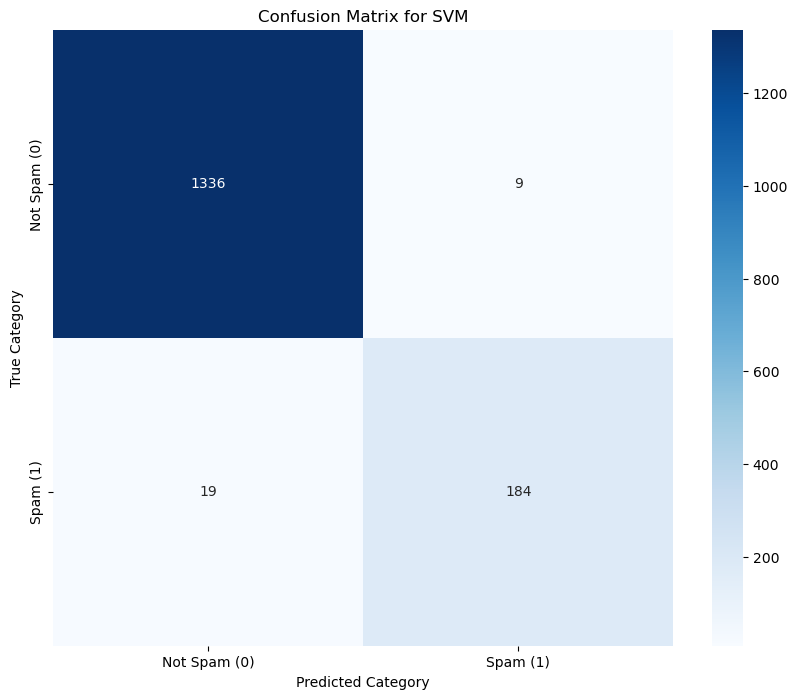

In [26]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Define the labels
labels = ['Not Spam (0)', 'Spam (1)']

plt.figure(figsize=(10,8))
sns.heatmap(cm_svm,annot=True,fmt='d', cmap="Blues" , xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid_svm = {
    'C': [0.5, 2, 5],
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale', 'auto'] 
}

# Initialize the SVM classifier
svm = SVC()

# Set up GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=4, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best score for SVM:", grid_search_svm.best_score_)

# Evaluate on the test set
grid_search_y_pred_svm = grid_search_svm.predict(X_test)
print("SVM Classification Report (with best parameters):")
print(classification_report(y_test, grid_search_y_pred_svm))


gs_svm_acc = accuracy_score(y_test, grid_search_y_pred_svm)
print("Decision Tree accuracy score:", gs_svm_acc)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best parameters for SVM: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVM: 0.9770029318384396
SVM Classification Report (with best parameters):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1345
           1       0.98      0.88      0.93       203

    accuracy                           0.98      1548
   macro avg       0.98      0.94      0.96      1548
weighted avg       0.98      0.98      0.98      1548

Decision Tree accuracy score: 0.9825581395348837


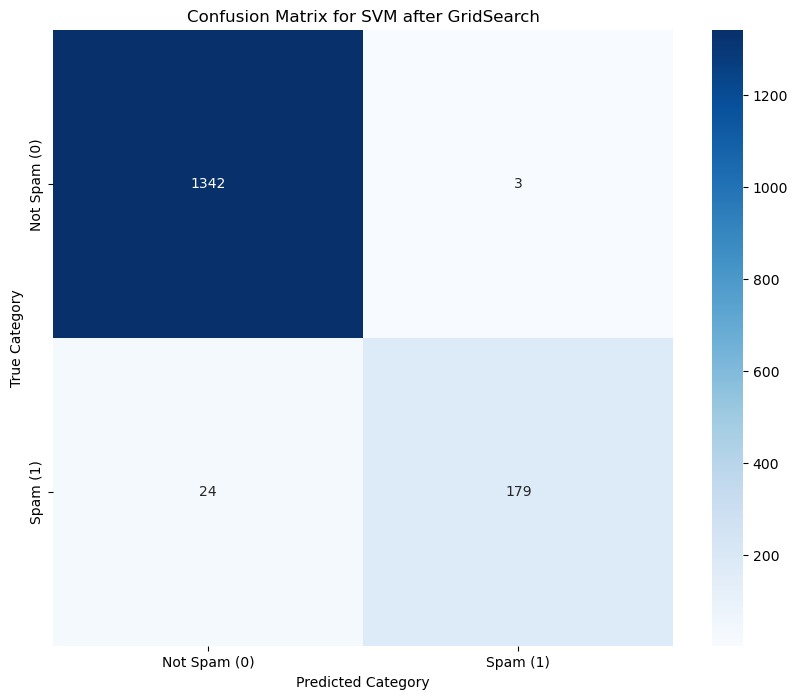

In [28]:
gs_cm_svm = confusion_matrix(y_test, grid_search_y_pred_svm)

# Define the labels
labels = ['Not Spam (0)', 'Spam (1)']

plt.figure(figsize=(10,8))
sns.heatmap(gs_cm_svm,annot=True,fmt='d', cmap="Blues" , xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for SVM after GridSearch')
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.show()

# Decision tree model

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model and train model
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_dt))

dt_acc = accuracy_score(y_test, y_pred_dt)
print("Decision Tree accuracy score:", dt_acc)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1345
           1       0.80      0.83      0.82       203

    accuracy                           0.95      1548
   macro avg       0.89      0.90      0.90      1548
weighted avg       0.95      0.95      0.95      1548

Decision Tree accuracy score: 0.9515503875968992


In [30]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}


# Perform randomized search
random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid_dt, 
                                      cv=5, scoring='accuracy', verbose=1, random_state=40)
random_search_dt.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search_dt.best_params_)

# Evaluate on the test set
random_search_y_pred_dt = random_search_dt.predict(X_test)
print("SVM Classification Report (with best parameters):")
print(classification_report(y_test, random_search_y_pred_dt))

rs_dt_acc = accuracy_score(y_test, random_search_y_pred_dt)
print("Decision Tree after Randomized Search accuracy score:", rs_dt_acc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}
SVM Classification Report (with best parameters):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1345
           1       0.79      0.68      0.73       203

    accuracy                           0.93      1548
   macro avg       0.87      0.83      0.85      1548
weighted avg       0.93      0.93      0.93      1548

Decision Tree after Randomized Search accuracy score: 0.9341085271317829


# Random Forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=30) 
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy score:", rf_acc)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1345
           1       0.93      0.88      0.91       203

    accuracy                           0.98      1548
   macro avg       0.96      0.94      0.95      1548
weighted avg       0.98      0.98      0.98      1548

Random Forest accuracy score: 0.9760981912144703


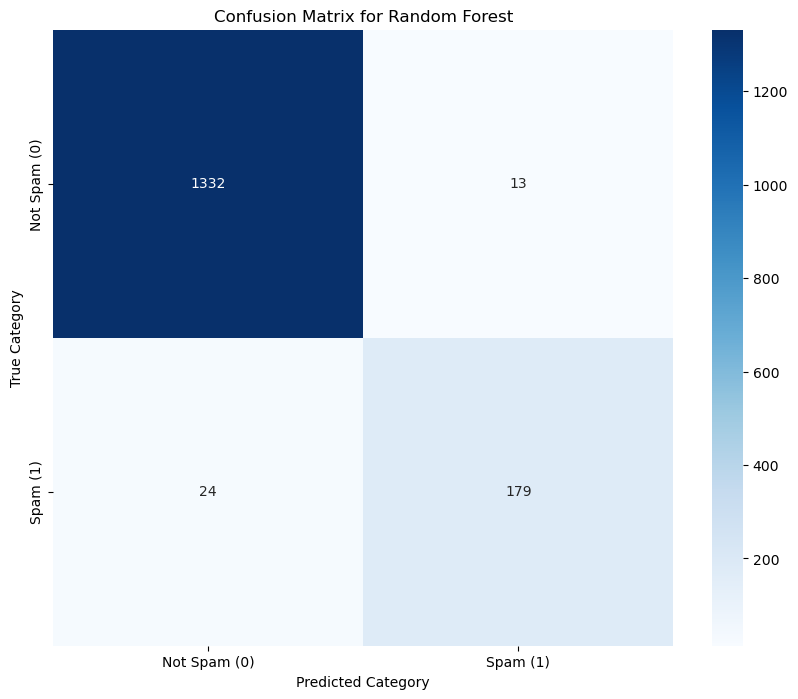

In [32]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Define the labels
labels = ['Not Spam (0)', 'Spam (1)']

plt.figure(figsize=(10,8))
sns.heatmap(cm_rf,annot=True,fmt='d', cmap="Blues" , xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.show()

# K Nearest neighbour

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

knn_acc = accuracy_score(y_test, y_pred_knn)
print("KNN accuracy score:", knn_acc)

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1345
           1       0.99      0.50      0.66       203

    accuracy                           0.93      1548
   macro avg       0.96      0.75      0.81      1548
weighted avg       0.94      0.93      0.92      1548

KNN accuracy score: 0.9334625322997416


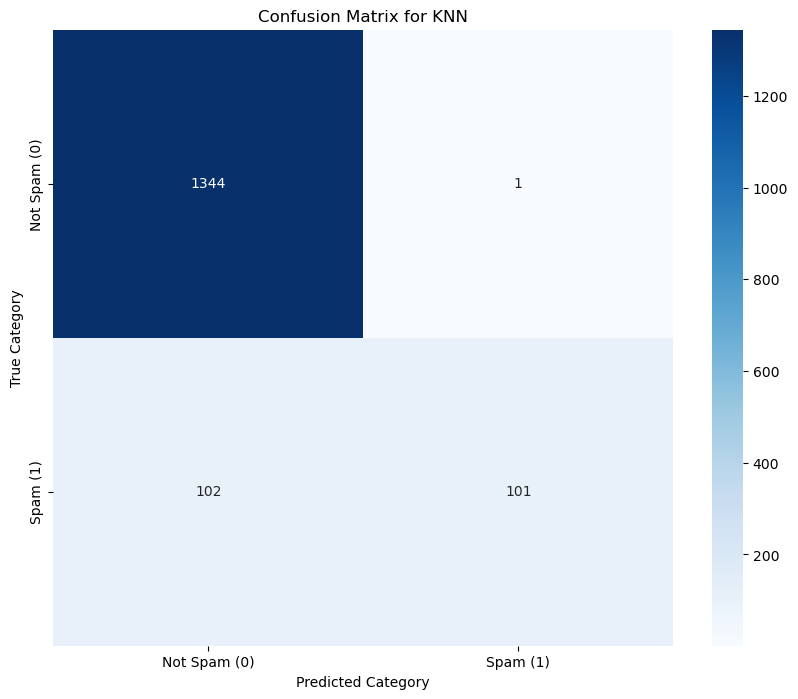

In [34]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Define the labels
labels = ['Not Spam (0)', 'Spam (1)']

plt.figure(figsize=(10,8))
sns.heatmap(cm_knn,annot=True,fmt='d', cmap="Blues" , xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.show()

# Deep learning model with Tensorflow

In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Build the neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 128)            │       128,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,449 (533.00 KB)

 Trainable params: 136,449 (533.00 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
# Train the model
base_model = model.fit(X_train, y_train, epochs=12, batch_size=50, validation_split=0.2)


# Predict on the test data
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Convert predictions to 1D array
y_pred_nn = y_pred_nn.ravel()

# Generate classification report
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

nn_acc = accuracy_score(y_test, y_pred_nn)
print("accuracy score:", nn_acc)

Epoch 1/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8068 - loss: 0.5691 - val_accuracy: 0.8809 - val_loss: 0.2480
Epoch 2/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8850 - loss: 0.1925 - val_accuracy: 0.9640 - val_loss: 0.1303
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.0759 - val_accuracy: 0.9765 - val_loss: 0.0816
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9929 - loss: 0.0328 - val_accuracy: 0.9765 - val_loss: 0.0842
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9937 - loss: 0.0184 - val_accuracy: 0.9765 - val_loss: 0.0882
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9978 - loss: 0.0096 - val_accuracy: 0.9737 - val_loss: 0.0889
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9996 - loss: 0.0067 - val_accuracy: 0.9737 - val_loss: 0.0947
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0066 - val_accuracy: 0.9737 - val_loss:

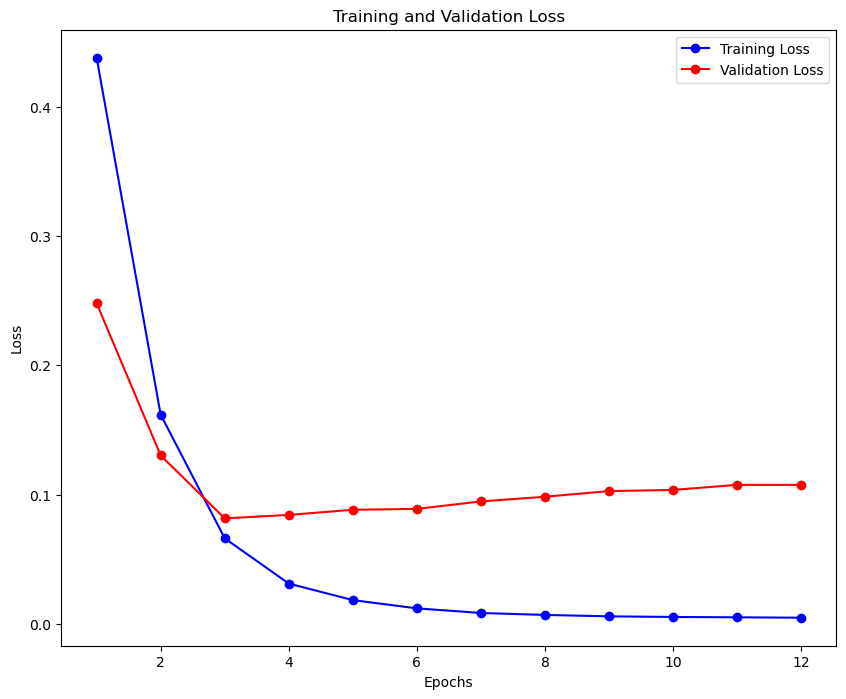

In [92]:
# Extracting loss values
training_loss = base_model.history['loss']
validation_loss = base_model.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 8))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

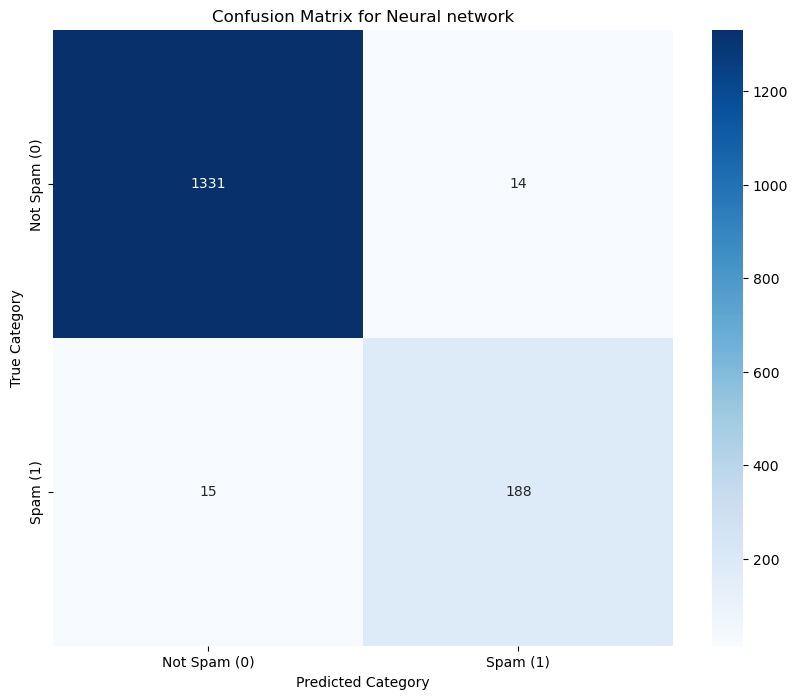

In [93]:
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Define the labels
labels = ['Not Spam (0)', 'Spam (1)']

plt.figure(figsize=(10,8))
sns.heatmap(cm_nn,annot=True,fmt='d', cmap="Blues" , xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Neural network')
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.show()

# Deeper neural network

In [95]:
from tensorflow.keras.layers import Dropout

# Build the deeper and refined neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 128)            │       128,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,497 (541.00 KB)

 Trainable params: 138,497 (541.00 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
# Train the model
deep_model = model.fit(X_train, y_train, 
                       epochs=12, 
                       batch_size=50, 
                       validation_split=0.2, 
                       verbose=1)

# Predict on the test data
y_pred_dnn = (model.predict(X_test) > 0.5).astype("int32")

# Convert predictions to 1D array
y_pred_dnn = y_pred_dnn.ravel()

# Generate classification report
print("Deeper Neural Network Classification Report:")
print(classification_report(y_test, y_pred_dnn))

dnn_acc = accuracy_score(y_test, y_pred_dnn)
print("Deeper Neural Network ccuracy score:", dnn_acc)

Epoch 1/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7953 - loss: 0.5882 - val_accuracy: 0.8809 - val_loss: 0.2766
Epoch 2/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8818 - loss: 0.2300 - val_accuracy: 0.8809 - val_loss: 0.1616
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9345 - loss: 0.1248 - val_accuracy: 0.9751 - val_loss: 0.1179
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9887 - loss: 0.0680 - val_accuracy: 0.9778 - val_loss: 0.0930
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9906 - loss: 0.0336 - val_accuracy: 0.9765 - val_loss: 0.1198
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9894 - loss: 0.0311 - val_accuracy: 0.9792 - val_loss: 0.1057
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9958 - loss: 0.0201 - val_accuracy: 0.9765 - val_loss: 0.1222
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9778 - val_loss:

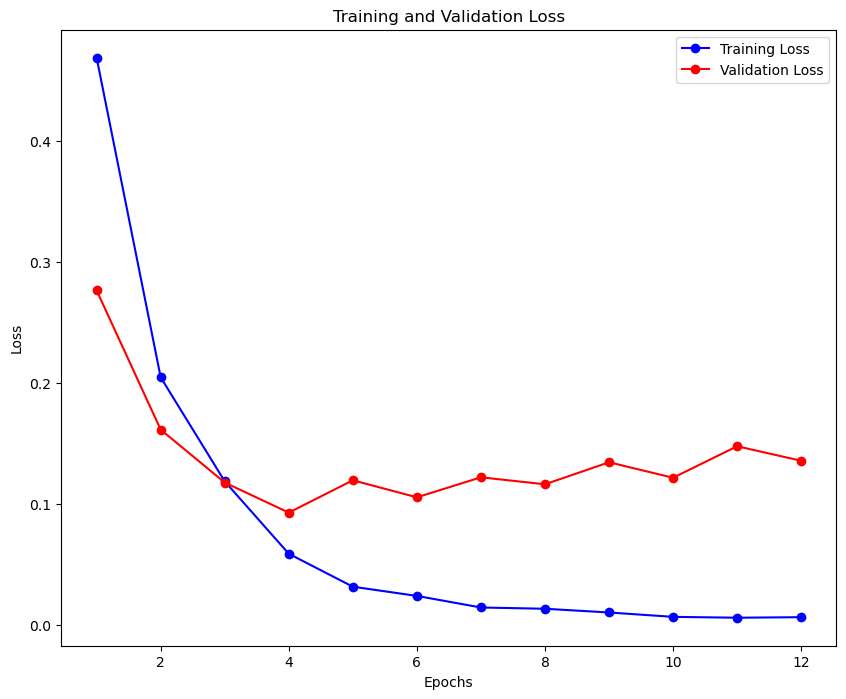

In [97]:
# Extracting loss values
training_loss = deep_model.history['loss']
validation_loss = deep_model.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 8))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

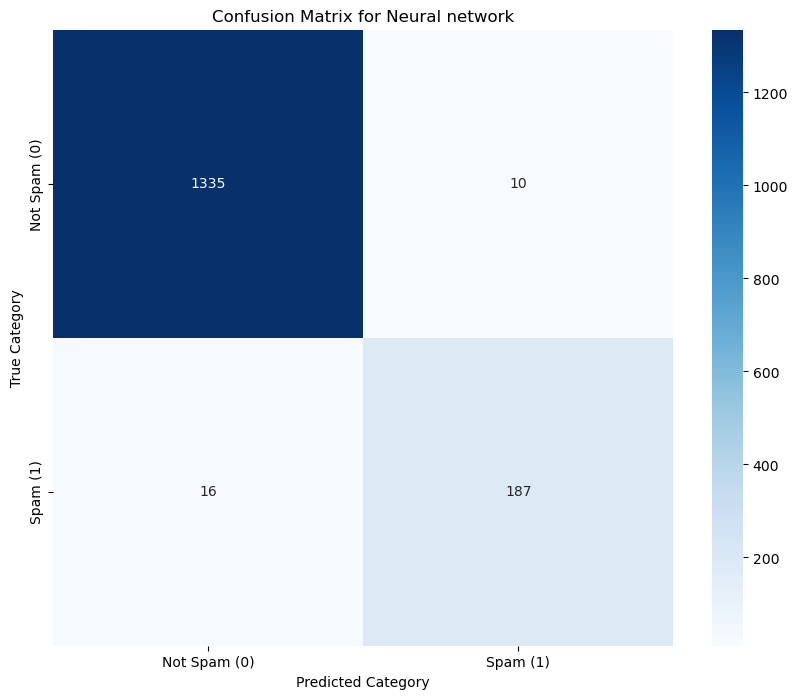

In [98]:
cm_dnn = confusion_matrix(y_test, y_pred_dnn)

# Define the labels
labels = ['Not Spam (0)', 'Spam (1)']

plt.figure(figsize=(10,8))
sns.heatmap(cm_dnn,annot=True,fmt='d', cmap="Blues" , xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Neural network')
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.show()

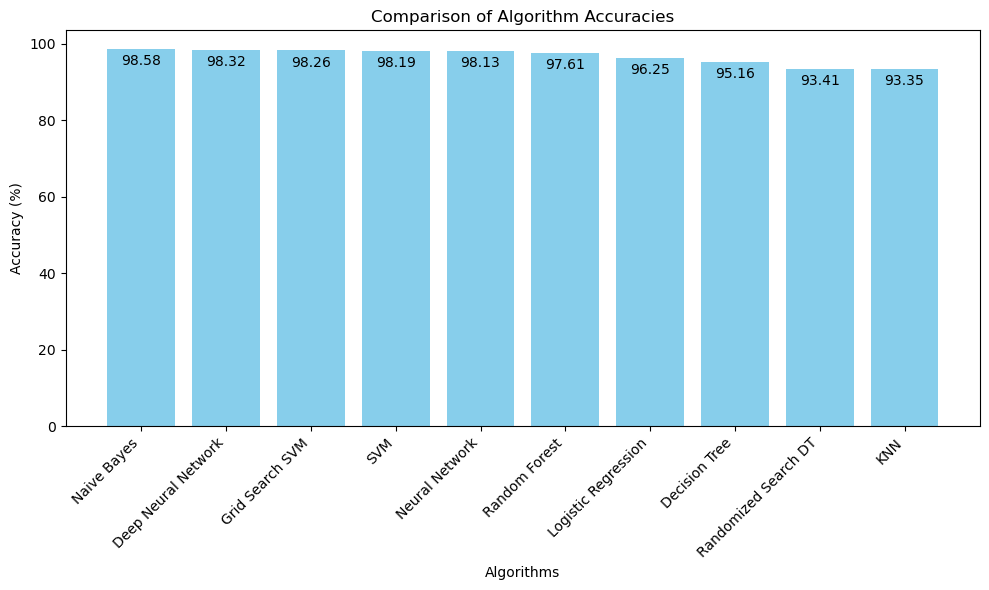

In [106]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Grid Search SVM', 
              'Decision Tree', 'Randomized Search DT', 'Random Forest', 
              'KNN', 'Neural Network', 'Deep Neural Network']

# Corresponding accuracies
accuracies = [log_acc, naive_acc, svm_acc, gs_svm_acc, dt_acc, rs_dt_acc, 
              rf_acc, knn_acc, nn_acc, dnn_acc]

# Convert accuracies to percentages
accuracies_percentage = [acc * 100 for acc in accuracies]

# Combine algorithm names and accuracies
data = list(zip(algorithms, accuracies_percentage))

# Sort data based on accuracies (highest to lowest)
data.sort(key=lambda x: x[1], reverse=True)

# Unzip sorted data
algorithms, accuracies_percentage = zip(*data)


plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, accuracies_percentage, color='skyblue')
# Adding accuracy score on each bar
for bar, acc in zip(bars, accuracies_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{acc:.2f}', 
             ha='center', va='bottom', color='black')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Algorithm Accuracies')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Conclusion
Naive Bayes classifier has the best performance of 98.58% accuracy as its simplicity and effective in capturing the underlying structure of the text data to distinguish between spam and non-spam emails accurately. Deep Neural Network through deep learning also shown to have a good performance of 98.32% where the deep neural network have 4 dense layers and 3 dropout layers. Other algorithm such as SVM also performance fairly well. However, KNN and Randomized Search Decision Tree performed fairly badly in comparison with accuracies of 93.35% and 93.41% respectively.

In summary, the email spam classification project showed the efficacy of various machine learning and deep learning techniques in distinguising between spam and non-spam emails. Further exploration and refinement of these models could lead to a even higher accuracies and better solution for tackling the detection and classification of spam emails.